# Research on car sales ads

We're an analyst at Crankshaft List and hundreds of free advertisements for vehicles are published on this site every day.

We will study the data collected over the last few years and determine which factors influence the price of a vehicle. 

# Table of Contents
[1 Open the data file and study the general information](#1heading)  
&emsp;[1.1 Conclusion](#1.1heading)  
[2 Data preprocessing](#2heading)  
&emsp;[2.1 Processing missing values](#2.1heading)  
&emsp;[2.2 Process Duplicates](#2.2heading)  
&emsp;[2.3 Data type replacement](#2.3heading)    
[3 Make calculations and add them to the table](#3heading)  
[4 Carry out exploratory data analysis](#4heading)  
&emsp;[4.1 Initial histograms](#4.1heading)  
&emsp;[4.2 Removing outliers](#4.2heading)  
&emsp;[4.3 Advertisements](#4.3heading)  
&emsp;[4.4 Advertisments and Average Price for each Vehicle Type](#4.4heading)  
&emsp;[4.5 Factors Impacting Price the Most for Top 2 Vehicle Types](#4.5heading)  
[5 Overall conclusion](#5heading)  
[6 Project completion checklist](#6heading)

## Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
vehicle_data = pd.read_csv('/Users/AntonioKuri/Desktop/Training/Practicum/Projects/Project 2/vehicles_us.csv')
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,6/23/18,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,10/19/18,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2/7/19,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,3/22/19,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,4/2/19,28


In [4]:
vehicle_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


<a id='1.1heading'></a>

### Conclusion

We can see a total of 51252 rows but model_year, cylinders, odometer, paint_color and is_4wd have less than entries than the total. Some data types are not appropriate for the columns -  will change in preprocessing stage. Additionally, the minimum is $1 for price and 1908 for model_year. These values are probably errors from the data collection stage.

<a id='2heading'></a>

## Data preprocessing

<a id='2.1heading'></a>

### Processing Missing Values

In [5]:
#count of nulls
print('Total Rows:', len(vehicle_data))
vehicle_data.isnull().sum()

Total Rows: 51525


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
#proportion of missing values
proportion_missing = vehicle_data.isnull().sum()/len(vehicle_data)
proportion_missing

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

<h6><center>Missing Values Explained:</center></h6>

The is_4wd column has almost exactly 50% of the values missing, while the other half contains the value 1. The column answers a boolean (yes or no) qusetion. Since half of the values are 1, it's fair to assume that the other half of the total is_4wd cells should be 0. In short, all missing values should be equal to 0.

The other categories with missing values are model_year, cylinders, odometer, and paint_color.

A possible explanation for the missing values is that they were left out on purpose or by mistake by the people who listed their cars for sale. However, it may also be the case that they are missing completely at random, which would mean that the missing values are not dependent on any features with the data.

Some other explanations are incorrect manual data entry procedures, equipment errors or incorrect measurements. Incorrect measurements in the columns with missing values could be a possible explanation as there are some car listings with absurd prices of less than $100 - perhaps a could zeros are missing in those prices.

<h6><center>Steps to fill rest of missing data:</center></h6>
Is_4wd: Fill missing values with the number 0.

Model_year: First we'll get the mean model_year for each car model, and use those means to fill the correspinding missing model_years. We'll used the mean value because were saw in Section 1 that the model_year column didn't have any outliers that would affect the mean in a drastic way.

Cylinders: Fill missing values based on median cylinders by car model (using the mean gives us wrong values, like 7 cylinders).

Odometer: Fill missing values based on the mean value for car model AND year because this encompasses the same car type and model, as well as same release year.

Paint_color: Fill with 'unkown' as there is no reasonable way of determining car color.

In [7]:
#Since is_4wd column consists of a Boolean field with 1s persent, will fill NaN values with 0
vehicle_data['is_4wd'].fillna(value= '0', inplace=True)
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,6/23/18,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,10/19/18,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2/7/19,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,3/22/19,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,4/2/19,28


In [8]:
#Fill missing values in model_year based on car model
vehicle_data['model_year'].fillna(
    vehicle_data.groupby(['model'])['model_year'].transform(np.mean), inplace=True
)
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.000000,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,6/23/18,19
1,25500,2009.354702,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,10/19/18,50
2,5500,2013.000000,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2/7/19,79
3,1500,2003.000000,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,3/22/19,9
4,14900,2017.000000,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,4/2/19,28


In [9]:
#Checking cylinders counts
vehicle_data['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [10]:
#Fill missing values in cylinders based on car model (using mean gives wrong values, like 7 cylinders)
vehicle_data['cylinders'].fillna(
    vehicle_data.groupby(['model'])['cylinders'].transform(np.median), inplace=True
)
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.000000,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,6/23/18,19
1,25500,2009.354702,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,10/19/18,50
2,5500,2013.000000,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2/7/19,79
3,1500,2003.000000,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,3/22/19,9
4,14900,2017.000000,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,4/2/19,28


In [11]:
#Checking new cylinders counts
vehicle_data['cylinders'].value_counts()

8.0     17712
6.0     17435
4.0     15499
10.0      549
5.0       294
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [12]:
#Fill missing values in odometer based on car model and year
vehicle_data['odometer'].fillna(
    vehicle_data.groupby(['model', 'model_year'])['odometer'].transform(np.mean), inplace=True
)
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.000000,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,6/23/18,19
1,25500,2009.354702,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,10/19/18,50
2,5500,2013.000000,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2/7/19,79
3,1500,2003.000000,ford f-150,fair,8.0,gas,175165.5,automatic,pickup,NaN,0,3/22/19,9
4,14900,2017.000000,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,4/2/19,28


In [13]:
#Found out that there are still nulls in this column after trying to change data types
#further in this notebook. Due to listings of unique model + year without odometer values
vehicle_data['odometer'].isnull().sum()

83

In [14]:
#Fill extra missing values in odometer based on only car model
vehicle_data['odometer'].fillna(
    vehicle_data.groupby(['model'])['odometer'].transform(np.mean), inplace=True
)

In [15]:
vehicle_data['odometer'].isnull().sum()

41

In [16]:
#We can see missing that odometers are all for the same car posting (duplicates)
vehicle_data[vehicle_data['odometer'].isnull()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0,1/15/19,16
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0,12/4/18,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0,8/23/18,70
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0,4/12/19,31
4149,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0,10/12/18,28


In [17]:
#Filled last missing odometer values of same listing with the mean for all postings
vehicle_data['odometer'].fillna((vehicle_data['odometer'].mean()), inplace=True)

In [18]:
#Rechecking of odometer nulls
vehicle_data['odometer'].isnull().sum()

0

In [19]:
#Change paint color to unknown
vehicle_data['paint_color'].fillna(value='unknown', inplace=True)
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.000000,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1,6/23/18,19
1,25500,2009.354702,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,10/19/18,50
2,5500,2013.000000,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2/7/19,79
3,1500,2003.000000,ford f-150,fair,8.0,gas,175165.5,automatic,pickup,unknown,0,3/22/19,9
4,14900,2017.000000,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,4/2/19,28


<h6><center>Source for odometer standard</center></h6>
https://www.caranddriver.com/research/a31543493/how-many-miles-should-a-new-car-have/#:~:text=The%20general%20rule%2C%20though%2C%20is,with%20fewer%20than%20200%20miles.

^This website states any car below **200 miles** can be considered as new.

https://didyouknowcars.com/how-many-miles-should-a-new-car-have/  

^This website states that if the car shows more than **100 miles**, you should consider asking for a different car or ask for a discount.

Therefore, we'll use **150 miles** as the standard for a 'new' car.

In [20]:
#Checking for condition value_counts
vehicle_data['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [21]:
#Change all cars with odometers <= 150 to new condition
vehicle_data.loc[vehicle_data['odometer'] <= 150, 'condition'] = 'new'

In [22]:
vehicle_data['condition'].value_counts()

excellent    24515
good         19971
like new      4659
fair          1597
new            671
salvage        112
Name: condition, dtype: int64

<a id='2.2heading'></a>

### Process Duplicates

In [23]:
#See all car models to find duplicate names written differently
model_value_counts = vehicle_data['model'].value_counts().rename_axis('model').reset_index(name='counts')
model_value_counts = model_value_counts.sort_values(by='model')
model_value_counts.head(60)

,model,counts
97,acura tl,236
85,bmw x5,267
84,buick enclave,271
65,cadillac escalade,322
49,chevrolet camaro,414
69,chevrolet camaro lt coupe 2d,311
79,chevrolet colorado,286
31,chevrolet corvette,499
40,chevrolet cruze,457
25,chevrolet equinox,591


In [24]:
model_value_counts.tail(40)

,model,counts
39,honda odyssey,457
73,honda pilot,302
46,hyundai elantra,423
83,hyundai santa fe,273
35,hyundai sonata,477
78,jeep cherokee,293
15,jeep grand cherokee,806
87,jeep grand cherokee laredo,256
55,jeep liberty,355
4,jeep wrangler,1119


Found ford f-150, ford f-250 sd, and ford f-350 sd to have duplicates.

In [25]:
#Replace condition values to numbers 1-5
vehicle_data['model'] = vehicle_data['model'].replace(
    ['ford f-150', 'ford f-250 sd', 'ford f-350 sd'], ['ford f150', 'ford f-250 super duty', 'ford f350 super duty'])

In [26]:
#Count total duplicates (based on all columns)
print('Total duplicates:', vehicle_data.duplicated().sum())

Total duplicates: 0


In [27]:
#Need to delete duplicates based on price, model_year, model, and odometer only
print(vehicle_data.query('model == "mercedes-benz benze sprinter 2500"'))

       price  model_year                              model  condition  \
42     34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
1642   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
2232   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
2731   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
4149   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
4681   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
5681   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
8975   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
10600  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
11541  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
11916  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
14796  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
14871  34900      2013.0  mercedes-ben

We can see in the query dataframe above that paint_color, date_posted and days_listed makes it so that we can't delete the duplicates yet.

In [28]:
#Drop duplicates
vehicle_data = vehicle_data.drop_duplicates(subset=['price', 'model_year', 'model', 'odometer'])
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40842 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         40842 non-null  int64  
 1   model_year    40842 non-null  float64
 2   model         40842 non-null  object 
 3   condition     40842 non-null  object 
 4   cylinders     40842 non-null  float64
 5   fuel          40842 non-null  object 
 6   odometer      40842 non-null  float64
 7   transmission  40842 non-null  object 
 8   type          40842 non-null  object 
 9   paint_color   40842 non-null  object 
 10  is_4wd        40842 non-null  object 
 11  date_posted   40842 non-null  object 
 12  days_listed   40842 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 4.4+ MB


In [29]:
#Verify duplicate deletion
print(vehicle_data.query('model == "mercedes-benz benze sprinter 2500"'))

    price  model_year                              model  condition  \
42  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   

    cylinders    fuel       odometer transmission type paint_color is_4wd  \
42        6.0  diesel  115538.840966    automatic  van       black      0   

   date_posted  days_listed  
42     1/15/19           16  


<a id='2.3heading'></a>

### Data Type Replacement

In this stage, we'll be replacing the data types for columns model_year, cylinders, odometer, date_posted

In [30]:
#Checking data types
vehicle_data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd           object
date_posted      object
days_listed       int64
dtype: object

In [31]:
#Replaceing data type for model_year category to int
vehicle_data['model_year'] = vehicle_data['model_year'].astype(int)

In [32]:
#Replaceing data type for cylinders category to int
vehicle_data['cylinders'] = vehicle_data['cylinders'].astype(int)

In [33]:
#Replaceing data type for odometer category to int
vehicle_data['odometer'] = vehicle_data['odometer'].astype(int)

#Replaceing data type for is_4wd category to bool
vehicle_data['is_4wd'] = vehicle_data['is_4wd'].astype(bool)

In [34]:
#Replaceing data type for odometer category to int (not bool to be able to make graphing analysis)
vehicle_data['is_4wd'] = vehicle_data['is_4wd'].astype(int)

In [35]:
vehicle_data.head(1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,6/23/18,19


In [36]:
#Replaceing data type for date_posted category to datetime
vehicle_data['date_posted'] = pd.to_datetime(vehicle_data['date_posted'])

In [37]:
#Checking data types
vehicle_data.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                   int64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

Note that all decimal values have been rounded up.

<a id='3heading'></a>

## Make calculations and add them to the table

In [38]:
#Replace condition values to numbers 1-5
vehicle_data['condition'] = vehicle_data['condition'].replace(
    ['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0])

In [39]:
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2009,ford f150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f150,1,8,gas,175165,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28


In [40]:
#Verify changed column data type
vehicle_data['condition'].dtypes

dtype('int64')

In [41]:
#Add column with day of the week the ad was placed
vehicle_data['weekday_posted'] = vehicle_data['date_posted'].dt.weekday

In [42]:
#Add column with month the ad was placed
vehicle_data['month_posted'] = vehicle_data['date_posted'].dt.month

In [43]:
#Add column with year the ad was placed
vehicle_data['year_posted'] = vehicle_data['date_posted'].dt.year

In [44]:
#Verify new columns
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018
1,25500,2009,ford f150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019
3,1500,2003,ford f150,1,8,gas,175165,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019


In [45]:
#Add vehicle_age column
vehicle_data['vehicle_age'] = (vehicle_data['year_posted'] - vehicle_data['model_year']) + 1
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,8
1,25500,2009,ford f150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,10
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,7
3,1500,2003,ford f150,1,8,gas,175165,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,17
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,3


Please note here that we added a +1 to the equation above to take into account the current year. If we don't do this, we end up with infinite values for year_avg_mileage as there would be many vehicle_age values of 0, which makes the equation divide by 0.

In [46]:
#Add column with vehicle's average mileage per year
vehicle_data['year_avg_mileage'] = vehicle_data['odometer']/(vehicle_data['vehicle_age'])
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,year_avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2009,ford f150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,10,8870.500000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f150,1,8,gas,175165,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,17,10303.823529
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,3,26967.666667


In [47]:
#Changing year_avg_mileage to int
vehicle_data['year_avg_mileage'] = vehicle_data['year_avg_mileage'].astype(int)
vehicle_data['year_avg_mileage'].dtypes

dtype('int64')

<a id='4heading'></a>

## Carry out exploratory data analysis

<a id='4.1heading'></a>

### Initial histograms

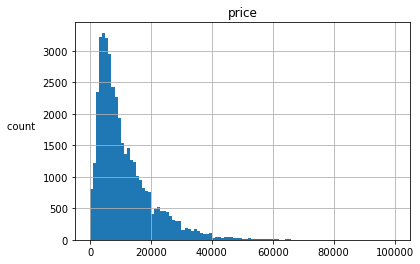

count     40842.000000
mean      11504.622325
std        9831.283079
min           1.000000
25%        4950.000000
50%        8500.000000
75%       15200.000000
max      375000.000000
Name: price, dtype: float64

In [48]:
#price histogram
vehicle_data.hist('price', bins=100, range=(0,100000))
plt.ylabel('count           ', rotation=0)
plt.show()
vehicle_data['price'].describe()

We can see in the price histogram that there are outliers to the right end of the distribution, making this histogram skewed to the right. The maximum value is a staggering 375,000, but values after around 45,000 are minimally present.

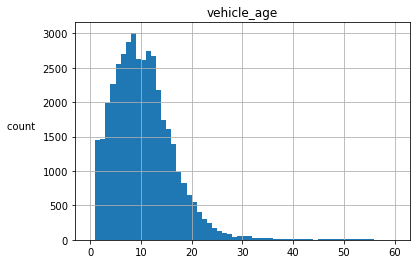

count    40842.000000
mean        10.084325
std          6.308763
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: vehicle_age, dtype: float64

In [49]:
#vehicle_age histogram
vehicle_data.hist('vehicle_age', bins=60, range=(0,60))
plt.ylabel('count           ', rotation=0)
plt.show()
vehicle_data['vehicle_age'].describe()

The vehicles' age histogram has a lot of outliers after 30 years of age, making the histogram skewed to the right. Keep in mind that the 75% quartile is only 13 years.

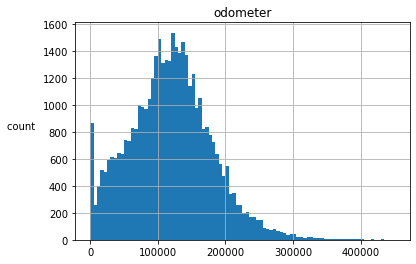

count     40842.000000
mean     119258.656089
std       62956.440679
min           0.000000
25%       77000.000000
50%      118564.000000
75%      156381.500000
max      990000.000000
Name: odometer, dtype: float64

In [50]:
#odometer histogram
vehicle_data.hist('odometer', bins=90, range=(0,450000))
plt.ylabel('count           ', rotation=0)
plt.show()
vehicle_data['odometer'].describe()

The odometer histogram shows a decent amount of outliers after around 20000. Let's keep in mind that the 3rd quartile is a mere 156387. This histogram also has a lot of odometers close or equal to 0, which signify new cars.

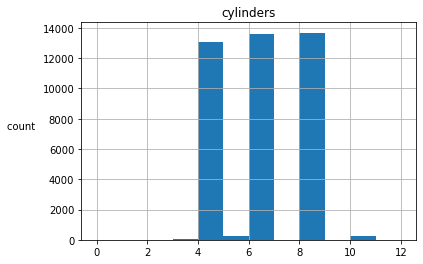

count    40842.000000
mean         6.043925
std          1.648928
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [51]:
#cylinders histogram
vehicle_data.hist('cylinders', bins=12, range=(0,12))
plt.ylabel('count           ', rotation=0)
plt.show()
vehicle_data['cylinders'].describe()

Since the cylinders histogram consists of only 7 present values close to each other (range of 12), there aren't really any outliers present. We could argue that cars with 3, 5, 10 and 12 cylinders are minimally present in the dataset and could be regarded as insignificant. However, this histogram is very legible and reliable.

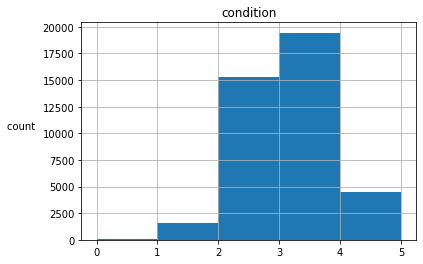

3    19444
2    15245
4     3951
1     1549
5      543
0      110
Name: condition, dtype: int64

In [52]:
#condition histogram
vehicle_data.hist('condition', bins=5, range=(0,5))
plt.ylabel('count           ', rotation=0)
plt.show()
vehicle_data['condition'].value_counts()

Since the condition histogram consists of only 5 present values close to each other (range of 5), there aren't any outliers present. This histogram is very legible and reliable.

<a id='4.2heading'></a>

### Removing outliers

Please note I didn't find the lower limit due to project instructions only asking to delete upper outliers

In [53]:
#Figuring out price outliers upper limit
Q1 = vehicle_data['price'].quantile(0.25)
Q3 = vehicle_data['price'].quantile(0.75)
IQR = Q3 - Q1
price_upper_outliers = Q3+1.5*IQR
print('Price upper limit:', price_upper_outliers)

Price upper limit: 30575.0


In [54]:
price_sample = vehicle_data.query('price <= @price_upper_outliers')

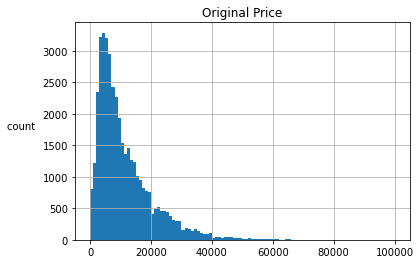

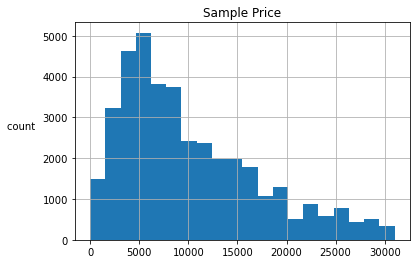

count    38964.000000
mean     10122.238528
std       6980.303259
min          1.000000
25%       4800.000000
50%       8000.000000
75%      13999.000000
max      30500.000000
Name: price, dtype: float64

In [55]:
#Comparing original and sample histograms
vehicle_data.hist('price', bins=100, range=(0,100000))
plt.title('Original Price')
plt.ylabel('count           ', rotation=0)
plt.show()
price_sample.hist('price', bins=20, range=(0,31000))
plt.title('Sample Price')
plt.ylabel('count           ', rotation=0)
plt.show()
price_sample['price'].describe()

The new sample histogram looks less smooth than the original due to there being less data on it. Less data generally means more noise. The interquartile points have been reduced and we can see a more balanced distribution than before.

In [56]:
#Figuring out vehicle_age outliers upper limit
Q1 = vehicle_data['vehicle_age'].quantile(0.25)
Q3 = vehicle_data['vehicle_age'].quantile(0.75)
IQR = Q3 - Q1
age_upper_outliers = Q3+1.5*IQR
print('Age upper limit:', age_upper_outliers)

Age upper limit: 23.5


In [57]:
age_sample = vehicle_data.query('vehicle_age <= @age_upper_outliers')

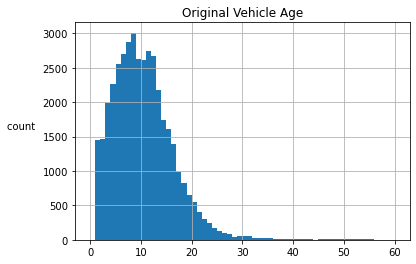

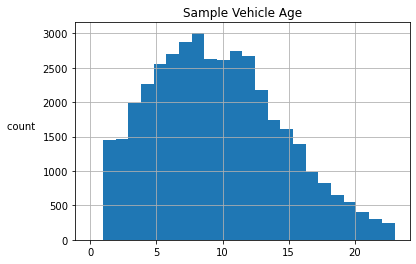

count    39832.000000
mean         9.528620
std          5.072207
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max         23.000000
Name: vehicle_age, dtype: float64

In [58]:
#Comparing original and sample histograms
vehicle_data.hist('vehicle_age', bins=60, range=(0,60))
plt.title('Original Vehicle Age')
plt.ylabel('count           ', rotation=0)
plt.show()
age_sample.hist('vehicle_age', bins=24, range=(0,23))
plt.title('Sample Vehicle Age')
plt.ylabel('count           ', rotation=0)
plt.show()
age_sample['vehicle_age'].describe()

The new sample histogram looks less smooth than the original due to there being less data on it. Less data generally means more noise. The interquartile points have been reduced and we can see a more balanced distribution than before.

In [59]:
#Figuring out odometer outliers upper limit
Q1 = vehicle_data['odometer'].quantile(0.25)
Q3 = vehicle_data['odometer'].quantile(0.75)
IQR = Q3 - Q1
odometer_upper_outliers = Q3+1.5*IQR
print('Odometer upper limit:', odometer_upper_outliers)

Odometer upper limit: 275453.75


In [60]:
odometer_sample = vehicle_data.query('odometer <= @odometer_upper_outliers')

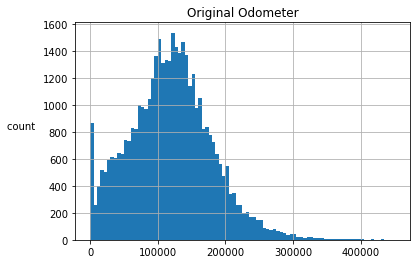

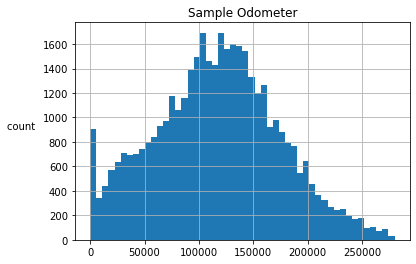

count     40323.000000
mean     116503.975547
std       57288.466744
min           0.000000
25%       76474.000000
50%      117596.000000
75%      154581.000000
max      275446.000000
Name: odometer, dtype: float64

In [61]:
#Comparing original and sample histograms
vehicle_data.hist('odometer', bins=90, range=(0,450000))
plt.title('Original Odometer')
plt.ylabel('count           ', rotation=0)
plt.show()
odometer_sample.hist('odometer', bins=50, range=(0,280000))
plt.title('Sample Odometer')
plt.ylabel('count           ', rotation=0)
plt.show()
odometer_sample['odometer'].describe()

The new sample histogram looks less smooth than the original due to there being less data on it. Less data generally means more noise. The interquartile points have been reduced and we can see a more balanced distribution than before. Additionally, we still see the huge amount of odometers close or equal to zero, which signify new cars.

In [62]:
#Figuring out cylinders outliers upper limit
Q1 = vehicle_data['cylinders'].quantile(0.25)
Q3 = vehicle_data['cylinders'].quantile(0.75)
IQR = Q3 - Q1
cylinders_upper_outliers = Q3+1.5*IQR
print('Cylinders upper limit:', cylinders_upper_outliers)
print('Cylinders max:', vehicle_data['cylinders'].max())

Cylinders upper limit: 14.0
Cylinders max: 12


Since the cylinders max is lower than the upper limit, we won't delete any data points.

In [63]:
#Figuring out condition outliers upper limit
Q1 = vehicle_data['condition'].quantile(0.25)
Q3 = vehicle_data['condition'].quantile(0.75)
IQR = Q3 - Q1
condition_upper_outliers = Q3+1.5*IQR
print('Condition upper limit:', condition_upper_outliers)
print('Condition max:', vehicle_data['condition'].max())

Condition upper limit: 4.5
Condition max: 5


Since the condition max is lower than the upper limit, we won't delete any data points.

<a id='4.3heading'></a>

### Advertisments

In this stage, we will start working with our cleaned data which excludes the outliers found in the prior stage. We will describe the typical lifetime of an ad and determine when ads were removed quickly and when they were listed for an abnormally long time. We'll be analyzing the top 10% and lower 10% of our listings when it comes to days_listed.

In [64]:
#Create new data frame with outliers removed from the analysis above
cleaned_vehicle_data = vehicle_data.query(
    'price <= @price_upper_outliers and vehicle_age <= @age_upper_outliers and odometer <= @odometer_upper_outliers')

Days_listed median: 33.0


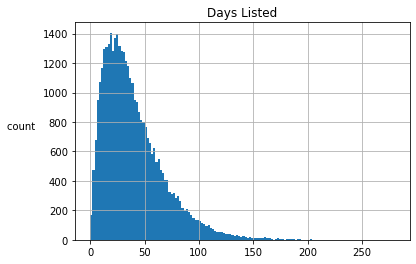

count    37514.000000
mean        39.534707
std         28.199405
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [65]:
#days_listed histogram
print('Days_listed median:', cleaned_vehicle_data['days_listed'].median())
cleaned_vehicle_data.hist('days_listed', bins=140, range=(0,280))
plt.title('Days Listed')
plt.ylabel('count           ', rotation=0)
plt.show()
cleaned_vehicle_data['days_listed'].describe()

In [66]:
#Getting days_listed standard deviation
days_listed_std_dev = np.std(cleaned_vehicle_data['days_listed'])
print('Days_listed standard deviation:',days_listed_std_dev)

Days_listed standard deviation: 28.1990291643709


In [67]:
#Getting limit for std dev above and below
days_listed__2std_below_limit = cleaned_vehicle_data['days_listed'].mean() - days_listed_std_dev*2
days_listed__1std_below_limit = cleaned_vehicle_data['days_listed'].mean() - days_listed_std_dev
days_listed__1std_above_limit = cleaned_vehicle_data['days_listed'].mean() + days_listed_std_dev
days_listed__2std_above_limit = cleaned_vehicle_data['days_listed'].mean() + days_listed_std_dev*2
print('Days_listed')
print('2 Std Dev lower limit:', days_listed__2std_below_limit)
print('1 Std Dev lower limit:', days_listed__1std_below_limit)
print('1 Std Dev upper limit:', days_listed__1std_above_limit)
print('2 Std Dev upper limit:', days_listed__2std_above_limit)

Days_listed
2 Std Dev lower limit: -16.86335128603774
1 Std Dev lower limit: 11.335677878333158
1 Std Dev upper limit: 67.73373620707495
2 Std Dev upper limit: 95.93276537144585


Since the distribution has a lower bound at 0, but no upper bound, it is skewwed right. In this case the empirical rule to use standard deviations to set lower and upper bounds for further analysis does not apply.

In [68]:
#Figuring out days_listed outliers upper limit - using lower 10% and upper 10%
lower_tenth = cleaned_vehicle_data['days_listed'].quantile(0.10)
upper_tenth = cleaned_vehicle_data['days_listed'].quantile(0.90)
print('Days listed lower limit:', lower_tenth)
print('Days listed upper limit:', upper_tenth)

Days listed lower limit: 10.0
Days listed upper limit: 77.0


In [69]:
#Creating new dataframe with rows having days_listed < lower tenth
days_listed_tenth_lower = cleaned_vehicle_data.query('days_listed < @lower_tenth')
#Creating new dataframe with rows having days_listed > upper tenth
days_listed_tenth_upper = cleaned_vehicle_data.query('days_listed > @upper_tenth')

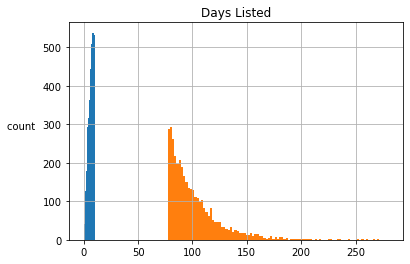

In [70]:
#Creating histograms for days_listed queries
days_listed_tenth_lower['days_listed'].hist(bins=10, range=(0,10))
days_listed_tenth_upper['days_listed'].hist(bins=100, range=(75,280))
plt.title('Days Listed')
plt.ylabel('count           ', rotation=0)
plt.show()

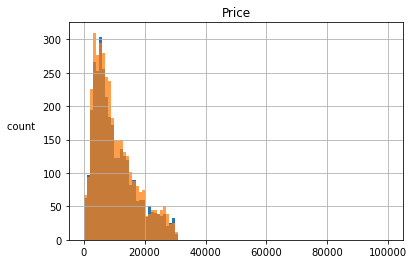

Blue: Tenth_lower
count     3341.000000
mean     10229.184077
std       6953.693670
min          1.000000
25%       4994.000000
50%       8250.000000
75%      13999.000000
max      30500.000000
Name: price, dtype: float64
Orange: Tenth_upper
count     3730.000000
mean     10324.428150
std       6959.857497
min          1.000000
25%       4995.000000
50%       8500.000000
75%      14000.000000
max      30500.000000
Name: price, dtype: float64


In [71]:
#Creating histogram for price - lower tenth and upper tenth for days_listed
days_listed_tenth_lower['price'].hist(bins=100, range=(0,100000))
days_listed_tenth_upper['price'].hist(bins=100, range=(0,100000), alpha = 0.75)
plt.title('Price')
plt.ylabel('count           ', rotation=0)
plt.show()
print('Blue: Tenth_lower')
print(days_listed_tenth_lower['price'].describe())
print('Orange: Tenth_upper')
print(days_listed_tenth_upper['price'].describe())

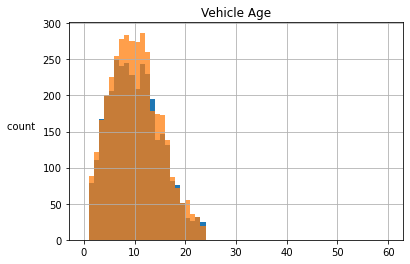

Blue: Tenth_lower
count    3341.000000
mean        9.654295
std         4.960192
min         1.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        23.000000
Name: vehicle_age, dtype: float64
Orange: Tenth_upper
count    3730.000000
mean        9.728954
std         4.889856
min         1.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        23.000000
Name: vehicle_age, dtype: float64


In [72]:
#Creating histogram for vehicle_age - lower tenth and upper tenth for days_listed
days_listed_tenth_lower['vehicle_age'].hist(bins=60, range=(0,60))
days_listed_tenth_upper['vehicle_age'].hist(bins=60, range=(0,60), alpha = 0.75)
plt.title('Vehicle Age')
plt.ylabel('count           ', rotation=0)
plt.show()
print('Blue: Tenth_lower')
print(days_listed_tenth_lower['vehicle_age'].describe())
print('Orange: Tenth_upper')
print(days_listed_tenth_upper['vehicle_age'].describe())

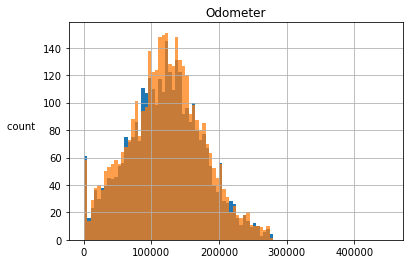

Blue: Tenth_lower
count      3341.000000
mean     120068.941036
std       55757.548643
min           0.000000
25%       82258.000000
50%      120971.000000
75%      158053.000000
max      275000.000000
Name: odometer, dtype: float64
Orange: Tenth_upper
count      3730.000000
mean     120694.556032
std       55315.316260
min           0.000000
25%       82994.750000
50%      121000.000000
75%      157000.000000
max      275000.000000
Name: odometer, dtype: float64


In [73]:
#Creating histogram for odometer - lower tenth and upper tenth for days_listed
days_listed_tenth_lower['odometer'].hist(bins=90, range=(0,450000))
days_listed_tenth_upper['odometer'].hist(bins=90, range=(0,450000), alpha = 0.75)
plt.title('Odometer')
plt.ylabel('count           ', rotation=0)
plt.show()
print('Blue: Tenth_lower')
print(days_listed_tenth_lower['odometer'].describe())
print('Orange: Tenth_upper')
print(days_listed_tenth_upper['odometer'].describe())

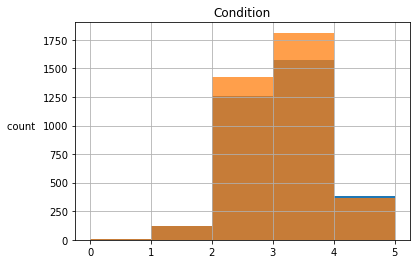

In [74]:
#Creating histogram for condition - lower tenth and upper tenth for days_listed
days_listed_tenth_lower['condition'].hist(bins=5, range=(0,5))
days_listed_tenth_upper['condition'].hist(bins=5, range=(0,5), alpha=0.75)
plt.title('Condition')
plt.ylabel('count           ', rotation=0)
plt.show()

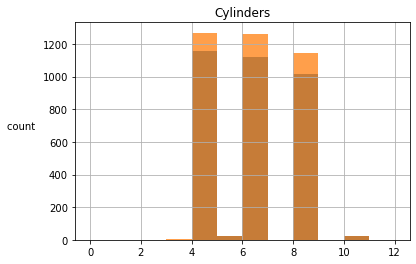

In [75]:
#Creating histogram for cylinders - lower tenth and upper tenth for days_listed
days_listed_tenth_lower['cylinders'].hist(bins=12, range=(0,12))
days_listed_tenth_upper['cylinders'].hist(bins=12, range=(0,12), alpha=0.75)
plt.title('Cylinders')
plt.ylabel('count           ', rotation=0)
plt.show()

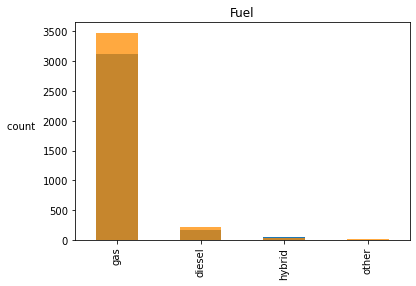

In [76]:
#Creating bar chart for fuel type count - lower tenth and upper tenth for days_listed
days_listed_tenth_lower['fuel'].value_counts().plot(kind='bar')
days_listed_tenth_upper['fuel'].value_counts().plot(kind='bar', alpha=0.75, color='darkorange')
plt.title('Fuel')
plt.ylabel('count           ', rotation=0)
plt.show()

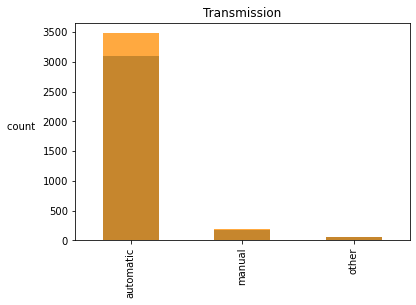

In [77]:
#Creating bar chart for transmission type count - lower tenth and upper tenth for days_listed
days_listed_tenth_lower['transmission'].value_counts().plot(kind='bar')
days_listed_tenth_upper['transmission'].value_counts().plot(kind='bar', alpha=0.75, color='darkorange')
plt.title('Transmission')
plt.ylabel('count           ', rotation=0)
plt.show()

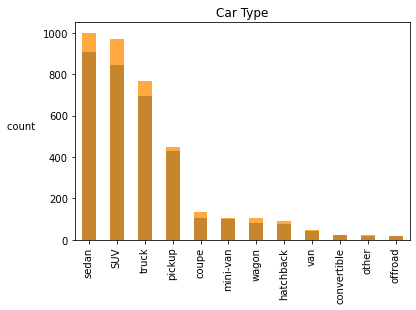

In [78]:
#Creating bar chart for car type count - lower tenth and upper tenth for days_listed
days_listed_tenth_lower['type'].value_counts().plot(kind='bar')
days_listed_tenth_upper['type'].value_counts().plot(kind='bar', alpha=0.75, color='darkorange')
plt.title('Car Type')
plt.ylabel('count           ', rotation=0)
plt.show()

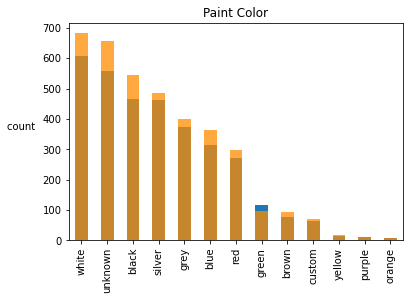

In [79]:
#Creating bar chart for paint_color count - lower tenth and upper tenth for days_listed
days_listed_tenth_lower['paint_color'].value_counts().plot(kind='bar')
days_listed_tenth_upper['paint_color'].value_counts().plot(kind='bar', alpha=0.75, color='darkorange')
plt.title('Paint Color')
plt.ylabel('count           ', rotation=0)
plt.show()

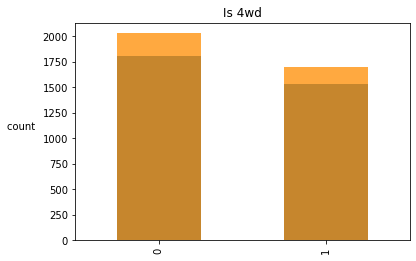

In [80]:
#Creating bar chart for is_4wd count - lower tenth and upper tenth for days_listed
days_listed_tenth_lower['is_4wd'].value_counts().plot(kind='bar')
days_listed_tenth_upper['is_4wd'].value_counts().plot(kind='bar', alpha=0.75, color='darkorange')
plt.title('Is 4wd')
plt.ylabel('count           ', rotation=0)
plt.show()

The typical lifetime of an ad is between 33 (median) and 39.5 (mean) days of listing. It's important to note that there are 390 more data points in the upper tenth quantile than in the lower tenth quantile -- 3731 vs 3341 -- which we used for our outliers analysis.

We've compared the both data queries with each other, and found that price, age, odometer, cylinders, transmission and 4wd were not indicators of whether a car was posted for a short or long period of time. Moreover, the better the condition of a car the faster it sold. Green cars tend to be sold much faster than other cars. Hybrid cars had a miniscule tendency to sell faster. Wagon, vans, convertibles, others and offroads sold a bit faster as well.

<a id='4.4heading'></a>

### Advertisments and Average Price for each Vehicle Type

In [81]:
#Pivot table showing the number of ads for each type of vehicle
days_count_pivot = cleaned_vehicle_data.pivot_table(index='type', values='days_listed', aggfunc='count')
days_count_pivot

,days_listed
type,
SUV,9585
bus,6
convertible,290
coupe,1315
hatchback,863
mini-van,1018
offroad,153
other,202
pickup,4789


In [82]:
#Pivot table showing the average price for each type of vehicle
price_mean_pivot = cleaned_vehicle_data.pivot_table(index='type', values='price', aggfunc='mean')
price_mean_pivot

,price
type,
SUV,10025.818466
bus,14228.666667
convertible,12986.734483
coupe,11078.381749
hatchback,6956.096176
mini-van,7825.896857
offroad,14049.267974
other,9999.599010
pickup,12973.331593


In [83]:
#Merging all pivot tables and sorting by days_listed
tables_merged = (days_count_pivot
                 .merge(price_mean_pivot, on='type', how='outer')
                 .sort_values(by='days_listed', ascending = False)
                )

print(tables_merged)

             days_listed         price
type                                  
sedan              10143   6906.581879
SUV                 9585  10025.818466
truck               7765  13975.187122
pickup              4789  12973.331593
coupe               1315  11078.381749
mini-van            1018   7825.896857
wagon                949   8571.515279
hatchback            863   6956.096176
van                  436   8384.926606
convertible          290  12986.734483
other                202   9999.599010
offroad              153  14049.267974
bus                    6  14228.666667


We can see from the table above that offroad cars and busses were the two most expensive vehicles on average but were the least listed based on days_listed. Sedan and SUV cars were the most listed, with Sedan cars being the most affordable while the average price of an SUV lingered in the middle compared the other types.

<function matplotlib.pyplot.show(close=None, block=None)>

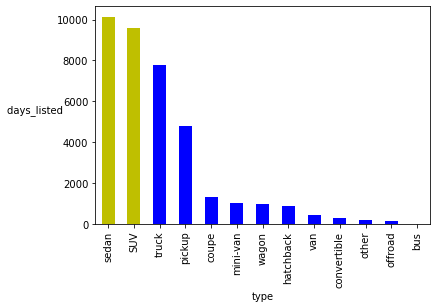

In [84]:
#Plotting bar graph showing the dependence of the number of ads on the vehicle type
color = ['y','y','b','b','b','b','b','b','b','b','b','b','b']

tables_merged['days_listed'].plot(kind='bar', color=color)
plt.ylabel('days_listed           ', rotation=0)
plt.show

The table above shows that sedan and SUV cars were the ones with most days listed on the site.

<a id='4.5heading'></a>

### Factors Impacting Price the Most for Top 2 Vehicle Types

In [85]:
#Create new dataframe with cleaned data containing only sedan and SUV
sedan_SUV_cleaned_vehicle_data = cleaned_vehicle_data.query('type in ("sedan", "SUV")')
sedan_SUV_cleaned_vehicle_data['type'].value_counts()

sedan    10143
SUV       9585
Name: type, dtype: int64

In [86]:
#Making dataframe containing only age, mileage, condition
scatter_sedan_SUV_cleaned_vehicle_data = sedan_SUV_cleaned_vehicle_data[['price', 'vehicle_age', 'odometer', 'condition']].copy()
scatter_sedan_SUV_cleaned_vehicle_data.head()

,price,vehicle_age,odometer,condition
0,9400,8,145000,2
2,5500,7,110000,4
4,14900,3,80903,3
5,14990,5,57954,3
6,12990,4,79212,3


                price  vehicle_age  odometer  condition
price        1.000000    -0.557603 -0.500279   0.257582
vehicle_age -0.557603     1.000000  0.621112  -0.297915
odometer    -0.500279     0.621112  1.000000  -0.376287
condition    0.257582    -0.297915 -0.376287   1.000000


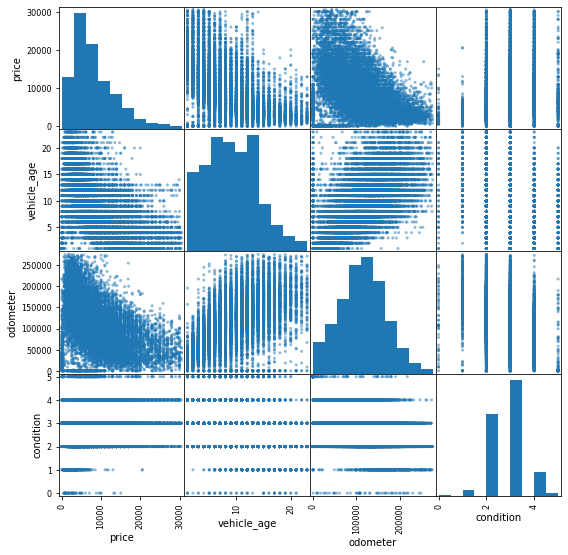

In [87]:
#Making scatterplots
print(scatter_sedan_SUV_cleaned_vehicle_data.corr())
pd.plotting.scatter_matrix(scatter_sedan_SUV_cleaned_vehicle_data, figsize=(9, 9))
plt.show()

Judging from the correlations and scatterplot matrices above, we can deduce that price is impacted greatly by vehicle age and mileage, but not so much by condition. We see a negative correlation of greater than -0.5 between price and the variable vehicile age and mileage, meaning that as age and mileage increase, price decreases. However, there is only a positive correlation of around 0.2 between price and condition, which suggests a slight potential increase in price given a better car condition.

In [88]:
#Getting new dataframe with > 50 ads for categories
boxplot_sedan_SUV_cleaned_vehicle_data = cleaned_vehicle_data.query('days_listed > 50')
boxplot_sedan_SUV_cleaned_vehicle_data['days_listed'].min()

51

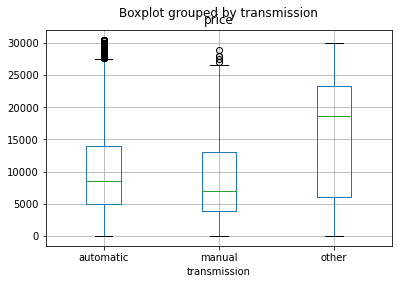

Median


transmission
other        18600
automatic     8495
manual        6995
Name: price, dtype: int64

In [89]:
#Creating boxplots for categorical variables transmission based on price
boxplot_sedan_SUV_cleaned_vehicle_data.boxplot(by='transmission', column =['price'])
plt.show()
print('Median')
boxplot_sedan_SUV_cleaned_vehicle_data.groupby('transmission')['price'].median().sort_values(ascending=False)

Based on median prices and interquartile ranges, the boxplots above show us that cars with other types of transmissions were were sold at higher price rates than automatic and manual tranmissions. Automatic and manual cars were sold at a relatively similar median (8495 vs 6995) and interquartile range, with manual being slighty lower on both.

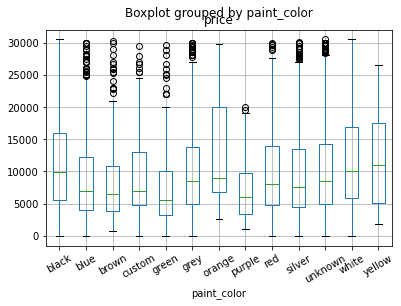

Median


paint_color
yellow     11000.0
white       9995.0
black       9950.0
orange      8900.0
unknown     8500.0
grey        8437.5
red         8000.0
silver      7500.0
custom      6995.0
blue        6950.0
brown       6500.0
purple      5998.0
green       5497.5
Name: price, dtype: float64

In [90]:
#Creating boxplots for categorical variables color based on price
ax = boxplot_sedan_SUV_cleaned_vehicle_data.boxplot(by='paint_color', column =['price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()
print('Median')
boxplot_sedan_SUV_cleaned_vehicle_data.groupby('paint_color')['price'].median().sort_values(ascending=False)

The cars colors that were sold at a higher medians were yellow, black, white, orange, unkown and grey. This means that half of their cars were sold at higher values than half of the other car colors. Purple and green cars were the ones sold at the lowest price interquartile ranges and lowest medians as well.

<a id='5heading'></a>

## Overall conclusion

From the analysis conducted, there are a variety of conlusion that we can make. After removing the outliers for every single variable present in the dataframe, we understood that the typical lifetime of an ad is around 35 days. 

Price, age, odometer, cylinders, transmission and 4wd were not indicators of whether a car was posted for a short or long period of time. However, the better a car's condition the faster it was sold, and interestingly, green cars were also sold faster than any other car.

The main factors that influenced a car's price were its age and mileage (strong correlations present). Logically, the greater either of those variables, the lower the price. A small relationship was shown between condition and price, suggesting a slight potential increase in price given a better car condition.

Furthermore, cars with other types of transmissions were were sold at higher prices than automatic and manual tranmissions. The cars colors that were sold at a higher price were yellow, black, white, orange, unkown and grey. Purple and green cars were generally sold at lower prices.

<a id='6heading'></a>

# Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn